In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Dataset 

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
iris = datasets.load_iris()
X_data = iris.data
y_data = iris.target

In [7]:
X_data.shape, y_data.shape

((150, 4), (150,))

In [8]:
np.unique(y_data)

array([0, 1, 2])

In [9]:
X_data_filter = X_data[np.logical_or(y_data == 0, y_data == 1)]
y_data_filter = y_data[np.logical_or(y_data == 0, y_data == 1)]

In [10]:
X_data_filter.shape, y_data_filter.shape, np.unique(y_data_filter)

((100, 4), (100,), array([0, 1]))

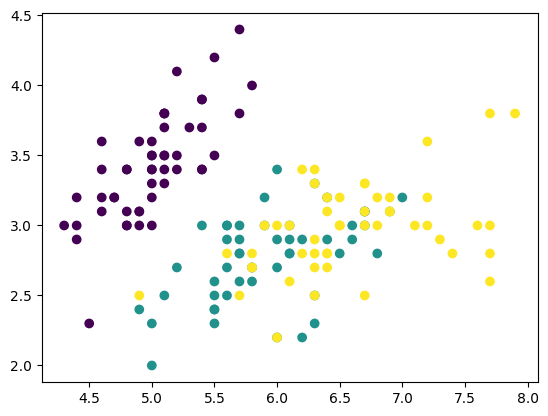

In [11]:
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data)

# Model

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
clf = KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9333333333333333


In [14]:
scores = []
for k in range(1, 100):
    clf = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_pred, y_test))

Text(0, 0.5, 'Accuracy score')

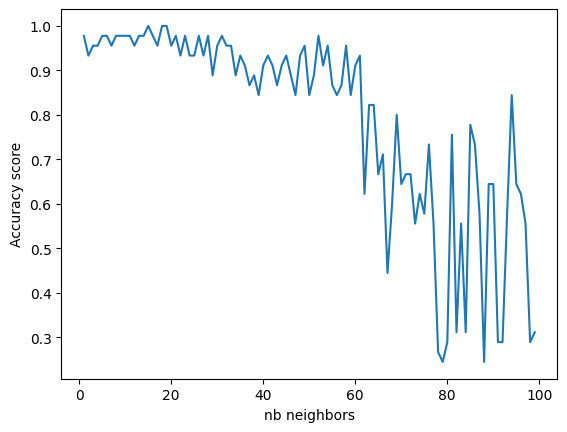

In [15]:
plt.plot(np.arange(1, 100), scores)
plt.xlabel("nb neighbors")
plt.ylabel("Accuracy score")